In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib.pyplot import figure

In [2]:
warnings.filterwarnings('ignore')

In [8]:
raw_data=pd.read_csv('amazon_kitchenware.csv')

In [4]:
raw_data.nunique()

title             262
brand             192
description        81
stars              11
reviewsCount      260
price/currency      1
price/value       148
breadCrumbs       121
asin              262
url               262
dtype: int64

In [5]:
raw_data.head(3)

,title,brand,description,stars,reviewsCount,price/currency,price/value,breadCrumbs,asin,url
0,Amazon Basics Digital Kitchen Scale with LCD D...,Amazon Basics,Product DescriptionAn Amazon Brand.From the Ma...,4.7,86863,$,12.59,Home & Kitchen › Kitchen & Dining › Kitchen Ut...,B06X9NQ8GX,https://www.amazon.com/dp/B06X9NQ8GX
1,"Vegetable Chopper, Pro Onion Chopper, 14 in 1M...",SNIFITAR,NaN,4.2,7188,$,17.99,Home & Kitchen › Kitchen & Dining › Kitchen Ut...,B0B41NL1JC,https://www.amazon.com/dp/B0B41NL1JC
2,"Hefty Ultra Strong Tall Kitchen Trash Bags, La...",Hefty,Trust Hefty Ultra Strong Tall Kitchen Trash Ba...,4.8,67700,$,10.18,Health & Household › Household Supplies › Pape...,B01BZ0LXL8,https://www.amazon.com/dp/B01BZ0LXL8


In [9]:
# I am going to remove the column 'price/currency' because this column has only one value '$'
raw_data=raw_data.drop('price/currency', axis=1)
raw_data=raw_data.rename(columns={'price/value':'price($)'})

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         262 non-null    object 
 1   brand         262 non-null    object 
 2   description   82 non-null     object 
 3   stars         262 non-null    float64
 4   reviewsCount  262 non-null    int64  
 5   price($)      259 non-null    float64
 6   breadCrumbs   261 non-null    object 
 7   asin          262 non-null    object 
 8   url           262 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.6+ KB


In [11]:
raw_data['brand'].value_counts().head(5)

brand
Zulay Kitchen     6
Utopia Kitchen    6
Hefty             5
Vtopmart          5
Reynolds          5
Name: count, dtype: int64

In [12]:
#getting top 5 brands as list
top_5_brands=raw_data['brand'].value_counts().head(5).index.tolist()

In [13]:
top_5_brands

['Zulay Kitchen', 'Utopia Kitchen', 'Hefty', 'Vtopmart', 'Reynolds']

In [14]:
#getting new df with these top 5 brands
mask=raw_data['brand'].isin(top_5_brands)
top_5_brands_df=raw_data[mask]

In [15]:
top_5_brands_df

,title,brand,description,stars,reviewsCount,price($),breadCrumbs,asin,url
2,"Hefty Ultra Strong Tall Kitchen Trash Bags, La...",Hefty,Trust Hefty Ultra Strong Tall Kitchen Trash Ba...,4.8,67700,10.18,Health & Household › Household Supplies › Pape...,B01BZ0LXL8,https://www.amazon.com/dp/B01BZ0LXL8
6,Zulay Kitchen Powerful Milk Frother Handheld F...,Zulay Kitchen,NaN,4.5,210375,9.99,"Home & Kitchen › Kitchen & Dining › Coffee, Te...",B09D8T11YS,https://www.amazon.com/dp/B09D8T11YS
7,"Hefty Ultra Strong Tall Kitchen Trash Bags, Fa...",Hefty,Trust Hefty Ultra Strong Tall Kitchen Trash Ba...,4.7,7450,15.72,Health & Household › Household Supplies › Pape...,B097F7XJM1,https://www.amazon.com/dp/B097F7XJM1
41,Zulay Kitchen Metal 2-in-1 Lemon Squeezer - St...,Zulay Kitchen,NaN,4.7,43571,14.99,Home & Kitchen › Kitchen & Dining › Kitchen Ut...,B00YBP918M,https://www.amazon.com/dp/B00YBP918M
49,"Reynolds Kitchens Slow Cooker Liners, Regular ...",Reynolds,Make memorable meals with Reynolds Kitchens Sl...,4.8,19120,6.96,Home & Kitchen › Kitchen & Dining › Small Appl...,B0765CN7CM,https://www.amazon.com/dp/B0765CN7CM
56,Zulay Kitchen Premium Garlic Press Set - Rust ...,Zulay Kitchen,NaN,4.6,22612,9.99,Home & Kitchen › Kitchen & Dining › Kitchen Ut...,B07N7KFHVH,https://www.amazon.com/dp/B07N7KFHVH
60,Reynolds Kitchens Unbleached Parchment Paper R...,Reynolds,Reynolds Kitchens Brown Parchment Paper is a r...,4.7,18100,3.99,Home & Kitchen › Kitchen & Dining › Bakeware ›...,B07PFYT8MC,https://www.amazon.com/dp/B07PFYT8MC
82,Utopia Kitchen Compost Bin for Kitchen Counter...,Utopia Kitchen,NaN,4.6,17544,19.99,Home & Kitchen › Storage & Organization › Tras...,B015DRQ36E,https://www.amazon.com/dp/B015DRQ36E
87,Utopia Kitchen Pre Seasoned Cast Iron Skillet ...,Utopia Kitchen,NaN,4.4,17260,28.99,Home & Kitchen › Kitchen & Dining › Cookware ›...,B06X8ZFGHP,https://www.amazon.com/dp/B06X8ZFGHP
120,"Reynolds Kitchens Cut-Rite Wax Paper, 75 Squar...",Reynolds,Reynolds Kitchens Cut-Rite Wax Paper is the pe...,4.7,4435,2.54,Home & Kitchen › Kitchen & Dining › Bakeware ›...,B0036QO8M6,https://www.amazon.com/dp/B0036QO8M6


In [16]:
top_5_brands_df.nunique()

title           27
brand            5
description      9
stars            5
reviewsCount    27
price($)        21
breadCrumbs     16
asin            27
url             27
dtype: int64

In [18]:
top_5_brands_df=top_5_brands_df[['title','brand','stars','reviewsCount','price($)']]
top_5_brands_df.shape

(27, 5)

In [19]:
top_5_brands_df

,title,brand,stars,reviewsCount,price($)
2,"Hefty Ultra Strong Tall Kitchen Trash Bags, La...",Hefty,4.8,67700,10.18
6,Zulay Kitchen Powerful Milk Frother Handheld F...,Zulay Kitchen,4.5,210375,9.99
7,"Hefty Ultra Strong Tall Kitchen Trash Bags, Fa...",Hefty,4.7,7450,15.72
41,Zulay Kitchen Metal 2-in-1 Lemon Squeezer - St...,Zulay Kitchen,4.7,43571,14.99
49,"Reynolds Kitchens Slow Cooker Liners, Regular ...",Reynolds,4.8,19120,6.96
56,Zulay Kitchen Premium Garlic Press Set - Rust ...,Zulay Kitchen,4.6,22612,9.99
60,Reynolds Kitchens Unbleached Parchment Paper R...,Reynolds,4.7,18100,3.99
82,Utopia Kitchen Compost Bin for Kitchen Counter...,Utopia Kitchen,4.6,17544,19.99
87,Utopia Kitchen Pre Seasoned Cast Iron Skillet ...,Utopia Kitchen,4.4,17260,28.99
120,"Reynolds Kitchens Cut-Rite Wax Paper, 75 Squar...",Reynolds,4.7,4435,2.54


<Axes: xlabel='price($)', ylabel='reviewsCount'>

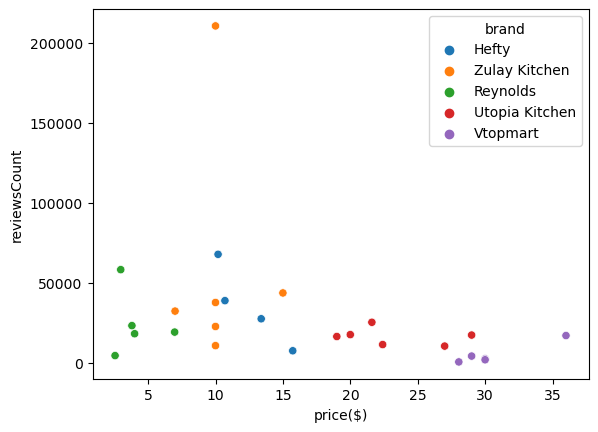

In [20]:
sns.scatterplot(
    data=top_5_brands_df,
    x='price($)',
    y='reviewsCount',
    hue='brand'
)

<Axes: xlabel='stars', ylabel='Count'>

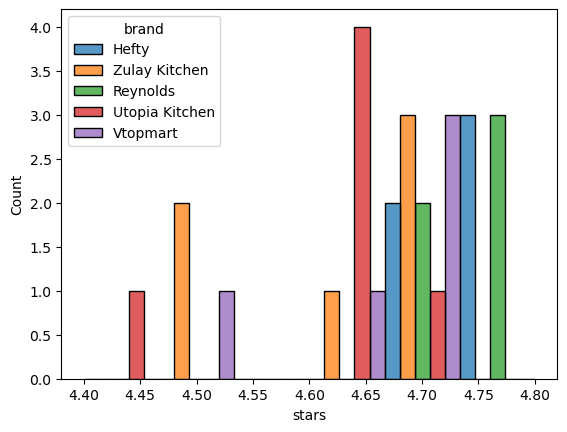

In [21]:
sns.histplot(
    data=top_5_brands_df,
    x='stars',
    hue='brand',
    multiple='dodge'
)

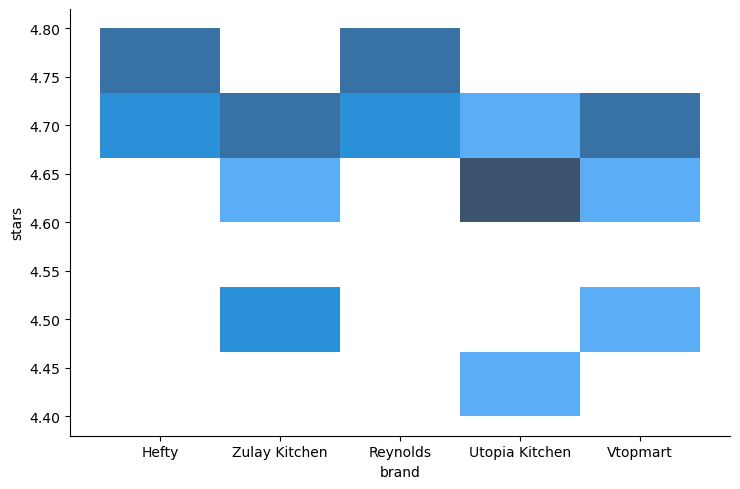

In [22]:
sns.displot(
    data=top_5_brands_df,
    x='brand',
    y='stars',
    aspect=1.5
)

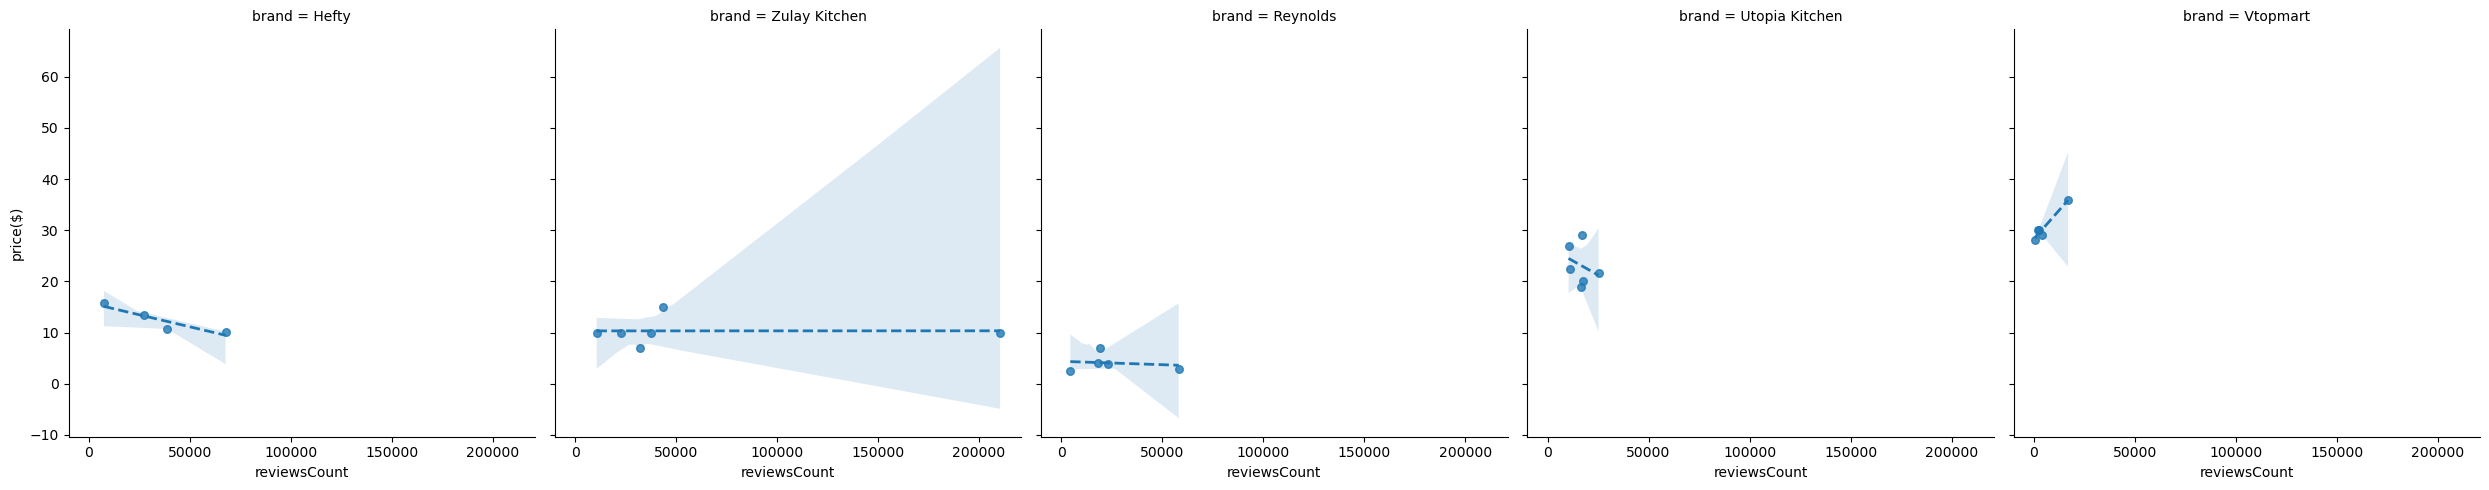

In [23]:
sns.lmplot(
    data=top_5_brands_df,
    x='reviewsCount',
    y='price($)',
    col='brand',
    palette='Set1', 
    fit_reg=True, 
    scatter_kws={"s": 30},
    line_kws={"lw":2, 'linestyle':'--'}
)